## Programmierung des Algorihmus (1)

In [7]:
from __future__ import annotations

### Beispieldaten vorbereiten

In [8]:
trainingsdaten = """ 
    niedlichkeit, flauschigkeit, spezies
    0.21, 0.91, vogelspinne
    0.27, 0.8, vogelspinne
    0.15, 0.75, vogelspinne
    0.37, 0.87, vogelspinne
    0.29, 0.7, vogelspinne
    0.9, 0.9, kaninchen
    0.86, 0.8, kaninchen
    0.75, 0.84, kaninchen
    0.95, 0.75, kaninchen
    0.7, 0.65, kaninchen
    0.31, 0.22, hai
    0.14, 0.13, hai
    0.21, 0.06, hai
    0.11, 0.25, hai
    0.33, 0.11, hai
    0.9, 0.1, igel
    0.8, 0.17, igel
    0.7, 0.11, igel
    0.75, 0.26, igel
    0.92, 0.22, igel
"""

### Daten in Objekte der Klasse *Tier* einlesen

In [9]:
class Tier:   
    def __init__(self, niedlichkeit: float, flauschigkeit: float, spezies: str) -> None:
        self.niedlichkeit: float = niedlichkeit
        self.flauschigkeit: float = flauschigkeit
        self.spezies: str = spezies

    def __repr__(self) -> str:
        return f"Tier({self.niedlichkeit}, {self.flauschigkeit}, '{self.spezies}')"
    
    def kopie_mit_spezies(self, neue_spezies: str) -> Tier:
        return Tier(self.niedlichkeit, self.flauschigkeit, neue_spezies)
    
    def __lt__(self, other) -> bool:
        return True  # Tiere sind eigentlich nicht vergleichbar; wir müssen aber irgendeine Implementierung angeben für die Sortierung später

In [10]:
def tier_einlesen(zeile: str) -> Tier:
    niedlichkeit, flauschigkeit, spezies = zeile.strip().split(", ")
    return Tier(float(niedlichkeit), float(flauschigkeit), spezies)

def tiere_aus_tabelle_einlesen(daten: str) -> list[Tier]:
    tiere = []
    zeilen = daten.strip().split("\n")
    for zeile in zeilen[1:]:   # 1. Zeile ist Überschrift, also überspringen
        tiere.append(tier_einlesen(zeile))
    return tiere

tiere = tiere_aus_tabelle_einlesen(trainingsdaten)

print(tiere)  # Ausgabe: [Tier(0.21, 0.91, 'vogelspinne'), Tier(0.27, 0.8, 'vogelspinne'), ...]

[Tier(0.21, 0.91, 'vogelspinne'), Tier(0.27, 0.8, 'vogelspinne'), Tier(0.15, 0.75, 'vogelspinne'), Tier(0.37, 0.87, 'vogelspinne'), Tier(0.29, 0.7, 'vogelspinne'), Tier(0.9, 0.9, 'kaninchen'), Tier(0.86, 0.8, 'kaninchen'), Tier(0.75, 0.84, 'kaninchen'), Tier(0.95, 0.75, 'kaninchen'), Tier(0.7, 0.65, 'kaninchen'), Tier(0.31, 0.22, 'hai'), Tier(0.14, 0.13, 'hai'), Tier(0.21, 0.06, 'hai'), Tier(0.11, 0.25, 'hai'), Tier(0.33, 0.11, 'hai'), Tier(0.9, 0.1, 'igel'), Tier(0.8, 0.17, 'igel'), Tier(0.7, 0.11, 'igel'), Tier(0.75, 0.26, 'igel'), Tier(0.92, 0.22, 'igel')]


### Daten visualisieren

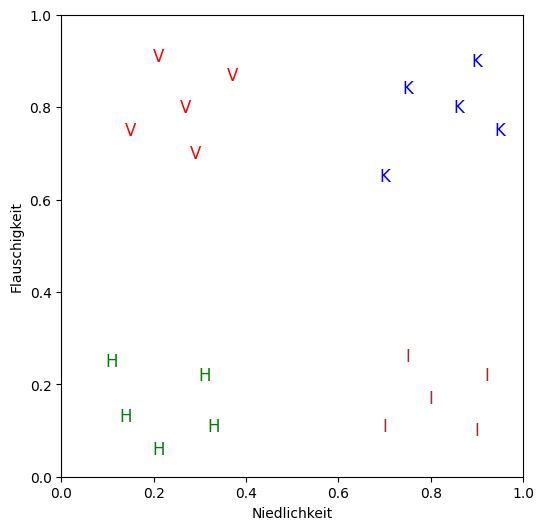

In [14]:
# Visualisierung
import matplotlib.pyplot as plt

spezies_zu_farbe = {
    "vogelspinne": "red",
    "kaninchen": "blue",
    "hai": "green",
    "igel": "brown",
    "?": "black"
}

def plotte_daten(alle: list[Tier], unbekanntes_tier: Tier = None, auswahl: list[Tier]=[]) -> None:
    """ Visualisiert die Tiere in einem Diagramm. 
    Falls der zweite und dritte Parameter gegeben sind, werden das unbekannte Tier und die ausgewählten Tiere
    durch Linien verbunden.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.xlabel("Niedlichkeit")
    plt.ylabel("Flauschigkeit")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    # Ausgewählte Tier mit Linien zum unbekannten Tier verbinden
    for tier in auswahl:
        plt.plot([unbekanntes_tier.niedlichkeit, tier.niedlichkeit], [unbekanntes_tier.flauschigkeit, tier.flauschigkeit], color="black", linestyle="--", linewidth=0.5)
    # Alle Tiere plotten
    if unbekanntes_tier != None and unbekanntes_tier not in alle:
        alle = alle + [unbekanntes_tier]
    for tier in alle:
        buchstabe = tier.spezies[0].upper()
        farbe = spezies_zu_farbe[tier.spezies]
        plt.text(tier.niedlichkeit, tier.flauschigkeit, buchstabe, color=farbe, fontsize=12, ha='center', va='center')
    plt.show()


plotte_daten(tiere)

### Einen (noch) ungelabelten Datensatz vorbereiten und anzeigen

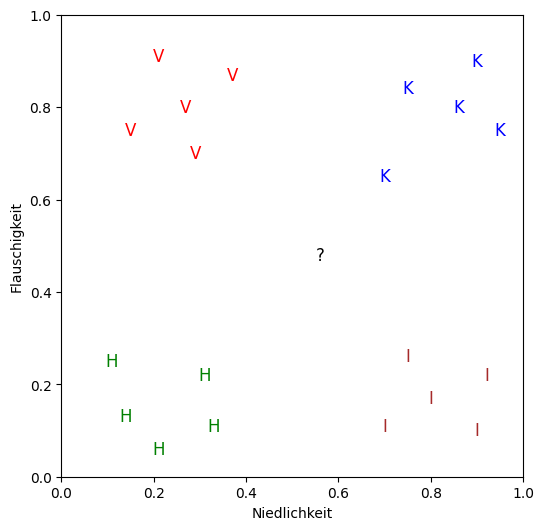

In [16]:
unbekanntes_tier = Tier(niedlichkeit=0.56, flauschigkeit=0.48, spezies="?")  # Fragezeichen für unbekannte Spezies

# plotte Daten und das unbekannte Tier
plotte_daten(tiere + [unbekanntes_tier])

## Ähnlichkeit als Distanz
Um herauszufinden, zu welcher Spezies das neue Tier gehört, müssen wir "ähnliche" Tiere
finden.  Die entscheidende Idee hierbei ist, dass wir Ähnlichkeit als *Distanz zwischen den
Datenpunkten* definieren: Jedes Tier ist charakterisiert durch zwei Merkmale (Niedlichkeit und
Flauschigkeit). Diese beiden Werte definieren einen *Punkt* im zweidimensionalen Raum. Je
kleiner der Abstand zwischen zwei Punkten, desto ähnlicher sind die beiden Tiere. Wenn wir
noch mehr Merkmale hätten, könnten wir den Raum entsprechend erweitern, also z.B. bei drei
Merkmalen den Abstand zwischen zwei Punkten im dreidimensionalen Raum berechnen.

### Euklidische Distanz

Es gibt verschiedene Definitionen für den Abstand zwischen zwei Punkten. Du kennst schon lange
den sogenannten **euklidischen Abstand**, der zwischen zwei 
Punkten $P(x_P, y_P)$ und $Q(x_Q, y_Q)$ in der Ebene wie folgt definiert ist:

$$
    d(P, Q) = \sqrt{(x_P - x_Q)^2 + (y_P - y_Q)^2}
$$

also über den **Satz des Pythagoras**. Für mehrdimensionale Räume gibt es eine Verallgemeinerung,
die du auch in der Formelsammlung findest:
    
$$
    d(P, Q) = \sqrt{\sum_{i=1}^n (x_{P_i} - x_{Q_i})^2}
$$

Wir setzen diese Definition als Python-Funktion um und lassen uns ein paar Distanzen anzeigen:

In [17]:
# Wir setzten diese Definition als Python-Funktion um und lassen uns ein paar Distanzen anzeigen:
def euklidische_distanz(tier1: Tier, tier2: Tier) -> float:
    d_niedlichkeit = tier1.niedlichkeit - tier2.niedlichkeit
    d_flauschigkeit = tier1.flauschigkeit - tier2.flauschigkeit
    distanz = (d_niedlichkeit**2 + d_flauschigkeit**2) ** 0.5  # Pythagoras!  (Erinnere dich: "hoch 1/2" = "Wurzel")
    return distanz

# Test: Wir vergleichen das unbekannte Tier mit einigen anderen aus der Liste

# Wir wählen vier beliebige Tiere aus, die wir vergleichen wollen 
auswahl = [tiere[3], tiere[9], tiere[10], tiere[15]]
print(f"Von unserem unbekannten {unbekanntes_tier} zum...")
for tier in auswahl:
    distanz = euklidische_distanz(unbekanntes_tier, tier)
    print(f"    {tier} beträgt die euklidische Distanz {distanz:.2f}")

Von unserem unbekannten Tier(0.56, 0.48, '?') zum...
    Tier(0.37, 0.87, 'vogelspinne') beträgt die euklidische Distanz 0.43
    Tier(0.7, 0.65, 'kaninchen') beträgt die euklidische Distanz 0.22
    Tier(0.31, 0.22, 'hai') beträgt die euklidische Distanz 0.36
    Tier(0.9, 0.1, 'igel') beträgt die euklidische Distanz 0.51


Praktischerweise kann die Funktion `plotte_daten()` auch Distanzen als Linien darstellen:

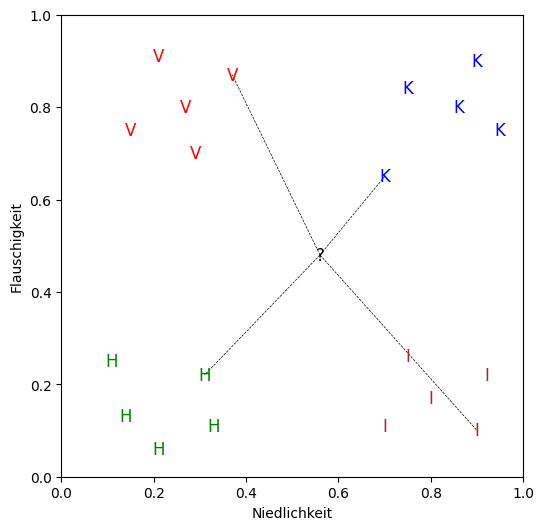

In [18]:
plotte_daten(tiere, unbekanntes_tier, auswahl)


### Manhattan-Distanz 
```{margin}
Der Name *Manhattan-Distanz*
kommt daher, dass die Straßen in Manhattan rechtwinklig zueinander verlaufen, und 
die Distanz zwischen zwei Punkten daher durch die Summe der horizontalen und vertikalen Distanzen
definiert ist. (Es ist egal, auf welchem genauen Weg man von einem Punkt zum anderen fährt, die
Distanz ist immer gleich.)
```

Es gibt aber auch andere Möglichkeiten, den Abstand zwischen zwei Punkten zu definieren. Eine
bekannte Alternative ist die sogenannte **Manhattan-Distanz**, bei der man einfach die Abstände
in den einzelnen Dimensionen aufaddiert:

$$
    d(P, Q) = |x_P - x_Q| + |y_P - y_Q|
$$

Hinweis: Der Betrag ist wichtig, weil wir nur positive Distanzen haben wollen, die sich zu einer Gesamtsumme aufaddieren 
und nicht etwa gegenseitig aufheben. 

```{margin}
Die Formelsammlung beschreibt auch noch ein drittes Distanzmaß, den
*Maximum-Abstand*:

$$
     d(P, Q) = \max(|p_1 - q_1|, |p_2 - q_2|)
$$

Für den k-nächste-Nachbarn-Algorithmus wird den Maximum-Abstand aber selten verwendet.
```


In [19]:
def manhattan_distanz(tier1: Tier, tier2: Tier) -> float:
    d_niedlichkeit = abs(tier1.niedlichkeit - tier2.niedlichkeit)
    d_flauschigkeit = abs(tier1.flauschigkeit - tier2.flauschigkeit)
    distanz = d_niedlichkeit + d_flauschigkeit
    return distanz

## Programmierung des Algorithmus (2)

### Die $k$ nächsten Nachbarn bestimmen

Unsortierte Distanzen: [(0.7800000000000001, Tier(0.21, 0.91, 'vogelspinne')), (0.6100000000000001, Tier(0.27, 0.8, 'vogelspinne')), (0.68, Tier(0.15, 0.75, 'vogelspinne')), (0.5800000000000001, Tier(0.37, 0.87, 'vogelspinne')), (0.49000000000000005, Tier(0.29, 0.7, 'vogelspinne')), (0.76, Tier(0.9, 0.9, 'kaninchen')), (0.62, Tier(0.86, 0.8, 'kaninchen')), (0.5499999999999999, Tier(0.75, 0.84, 'kaninchen')), (0.6599999999999999, Tier(0.95, 0.75, 'kaninchen')), (0.30999999999999994, Tier(0.7, 0.65, 'kaninchen')), (0.51, Tier(0.31, 0.22, 'hai')), (0.77, Tier(0.14, 0.13, 'hai')), (0.77, Tier(0.21, 0.06, 'hai')), (0.68, Tier(0.11, 0.25, 'hai')), (0.6000000000000001, Tier(0.33, 0.11, 'hai')), (0.72, Tier(0.9, 0.1, 'igel')), (0.5499999999999999, Tier(0.8, 0.17, 'igel')), (0.5099999999999999, Tier(0.7, 0.11, 'igel')), (0.4099999999999999, Tier(0.75, 0.26, 'igel')), (0.62, Tier(0.92, 0.22, 'igel'))]
Sortierte Distanzen: [(0.30999999999999994, Tier(0.7, 0.65, 'kaninchen')), (0.4099999999999999,

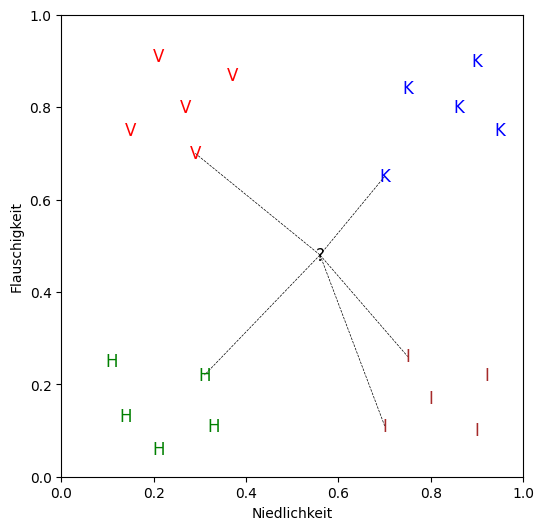

In [21]:
# Wir sammeln die Distanzen aller bekannten Tiere (gelabelten Daten) zum unbekannten Tier (ungelabelter Datensatz).
# In dieser Fassung machen wir das möglichst einfach und nachvollziehbar, ohne fortgeschrittene Python-Features.
def berechne_manhattan_distanzen(ungelabelt: Tier, gelabelte_daten: list[Tier]) -> list[tuple[float, Tier]]:
    distanzen = []
    for tier in gelabelte_daten:
        distanz = manhattan_distanz(ungelabelt, tier)
        tupel = (distanz, tier)  # Wir müssen uns die Distanz, aber auch das Tier merken (wichtig für die spätere Zuordnung nach dem Sortieren)
        distanzen.append(tupel)
    return distanzen

# Anwendung auf unsere Beispiel-Daten
manhattan_distanzen = berechne_manhattan_distanzen(unbekanntes_tier, tiere)
print("Unsortierte Distanzen:", manhattan_distanzen)

# Wir wollen die unserem unbekannten Tier am nächsten liegenden Tiere finden, also sortieren wir die Liste
manhattan_distanzen.sort()  # Sortiert wird nach dem ersten Element des Tupels, also der Distanz
print("Sortierte Distanzen:", manhattan_distanzen)

def k_naechste_nachbarn(k: int, distanzen: list[tuple[float, Tier]]) -> list[Tier]:
    k_nachbarn = []
    for i in range(k):
        distanz, tier = distanzen[i]
        k_nachbarn.append(tier)  # Jetzt interessiert uns nur noch das Tier, nicht mehr die Distanz
    return k_nachbarn

k = 5
k_nachbarn = k_naechste_nachbarn(k, manhattan_distanzen)
print(f"Die {k} nächsten Nachbarn sind: {k_nachbarn}")

plotte_daten(tiere, unbekanntes_tier, k_nachbarn)

### Eine "Abstimmung" unter den nächsten Nachbarn durchführen

In [22]:
def haeufigkeiten_ermitteln(nachbarn: list[Tier]) -> dict[str, int]:
    haeufigkeiten: dict[str, int] = {} # In diesem assoziativen Array (Dictionary) zählen wir, wie oft jede Spezies in den k nächsten Nachbarn vorkommt
    for tier in nachbarn:
        spezies = tier.spezies
        if spezies not in haeufigkeiten:
            haeufigkeiten[spezies] = 1  # Erster Eintrag für diese Spezies
        else:
            haeufigkeiten[spezies] += 1 # Schon bekannt, also Zähler erhöhen
    return haeufigkeiten

# Anwendung auf unsere Beispieldaten
haeufigkeiten = haeufigkeiten_ermitteln(k_nachbarn)
print("Häufigkeiten der Spezies:", haeufigkeiten)

Häufigkeiten der Spezies: {'kaninchen': 1, 'igel': 2, 'vogelspinne': 1, 'hai': 1}


Als Ergebnis des k-NN-Algorithmus ergibt sich für das unbekannte Tier Tier(0.56, 0.48, '?') die Spezies:
igel


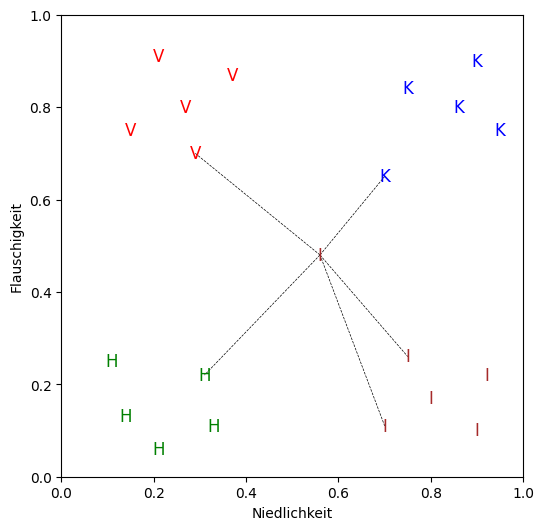

In [23]:
# Wir wählen die Spezies mit der höchsten Häufigkeit

def haeufigsten_wert_ermitteln(haeufigkeiten: dict[str, int]) -> str:
    haeufigste_spezies: str = ""
    max_h = 0
    for spezies in haeufigkeiten:
        h = haeufigkeiten[spezies]
        if h > max_h:
            haeufigste_spezies = spezies
            max_h = h
    return haeufigste_spezies

# Anwendung auf unsere Beispieldaten
haeufigste_spezies = haeufigsten_wert_ermitteln(haeufigkeiten)
print(f"Als Ergebnis des k-NN-Algorithmus ergibt sich für das unbekannte Tier {unbekanntes_tier} die Spezies:")
print(haeufigste_spezies)

# Passt das Ergebnis zu den k nächsten Nachbarn?
klassifiziertes_tier = unbekanntes_tier.kopie_mit_spezies(haeufigste_spezies)
plotte_daten(tiere, klassifiziertes_tier, k_nachbarn)


### Der Algorithmus als Ganzes

In [24]:
# Wir fassen die bisherigen Schritte in einer Funktion zusammen
def k_naechste_nachbarn_bestimmen(unbekanntes_tier: Tier, gelabelte_daten: list[Tier], k: int) -> tuple[str, list[Tier]]:
    """ Bestimmt die k nächsten Nachbarn eines unbekannten Tiers und deren häufigste Spezies.
    Parameter:
        unbekanntes_tier (Tier): Das Tier, dessen Spezies bestimmt werden soll.
        gelabelte_daten (list[Tier]): Liste von Tieren mit bekannten Spezies.
        k (int): Anzahl der nächsten Nachbarn.
    Rückgabe:
        tuple[str, list[Tier]]: Die häufigste Spezies und die k nächsten Nachbarn. """
    
    distanzen: list[tuple[float, Tier]] = berechne_manhattan_distanzen(unbekanntes_tier, gelabelte_daten)
    distanzen.sort()
    k_nachbarn = k_naechste_nachbarn(k, distanzen)
    haeufigkeiten = haeufigkeiten_ermitteln(k_nachbarn)
    spezies = haeufigsten_wert_ermitteln(haeufigkeiten)
    return spezies, k_nachbarn   # Wir geben auch die k nächsten Nachbarn zurück, damit wir sie später visualisieren können

### Einige Beispiele

In [25]:
def klassifiziere_und_plotte(test_tier: Tier, tiere: list[Tier], k: int) -> None:
    spezies, k_nachbarn = k_naechste_nachbarn_bestimmen(test_tier, tiere, k)
    print(f"Das unbekannte Tier {test_tier} wird klassifiziert als: {spezies}")
    klassifiziertes_tier = test_tier.kopie_mit_spezies(spezies)
    plotte_daten(tiere, klassifiziertes_tier, k_nachbarn)

Das unbekannte Tier Tier(0.56, 0.68, '?') wird klassifiziert als: vogelspinne


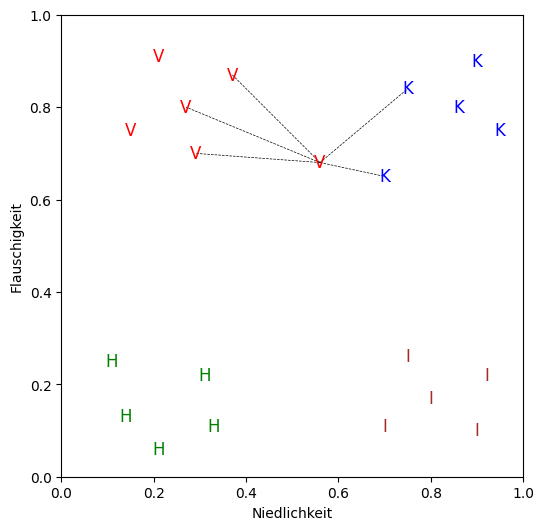

In [26]:
test_tier = Tier(niedlichkeit=0.56, flauschigkeit=0.68, spezies="?")
k = 5  # Probiere auch andere kleine oder große Werte

klassifiziere_und_plotte(test_tier, tiere, k)

Das nächste Beispiel führt zu einem etwas unbefriedigenden Ergebnis... Findest du nicht auch?

Das unbekannte Tier Tier(0.56, 0.48, '?') wird klassifiziert als: kaninchen


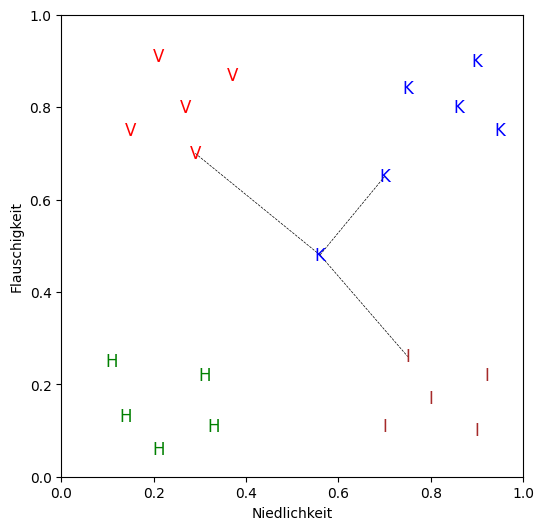

In [27]:
test_tier = Tier(niedlichkeit=0.56, flauschigkeit=0.48, spezies="?")
k = 3  

klassifiziere_und_plotte(test_tier, tiere, k)